In [11]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import walk
import pylab
import random

In [3]:
filenames = next(walk("Part1\\by_block"), (None, None, []))[2]

In [4]:
filenames

['0_ecg_.csv',
 '0_gsr_ppg_.csv',
 '10_ecg_.csv',
 '10_gsr_ppg_.csv',
 '11_ecg_.csv',
 '11_gsr_ppg_.csv',
 '12_ecg_.csv',
 '12_gsr_ppg_.csv',
 '13_ecg_.csv',
 '13_gsr_ppg_.csv',
 '14_ecg_.csv',
 '14_gsr_ppg_.csv',
 '15_ecg_.csv',
 '15_gsr_ppg_.csv',
 '16_ecg_.csv',
 '16_gsr_ppg_.csv',
 '17_ecg_.csv',
 '17_gsr_ppg_.csv',
 '18_ecg_.csv',
 '18_gsr_ppg_.csv',
 '19_ecg_.csv',
 '19_gsr_ppg_.csv',
 '1_ecg_.csv',
 '1_gsr_ppg_.csv',
 '20_ecg_.csv',
 '20_gsr_ppg_.csv',
 '21_ecg_.csv',
 '21_gsr_ppg_.csv',
 '22_ecg_.csv',
 '22_gsr_ppg_.csv',
 '23_ecg_.csv',
 '23_gsr_ppg_.csv',
 '24_ecg_.csv',
 '24_gsr_ppg_.csv',
 '25_ecg_.csv',
 '25_gsr_ppg_.csv',
 '26_ecg_.csv',
 '26_gsr_ppg_.csv',
 '27_ecg_.csv',
 '27_gsr_ppg_.csv',
 '28_ecg_.csv',
 '28_gsr_ppg_.csv',
 '29_ecg_.csv',
 '29_gsr_ppg_.csv',
 '2_ecg_mathtest.csv',
 '2_gsr_ppg_mathtest.csv',
 '30_ecg_.csv',
 '30_gsr_ppg_.csv',
 '31_ecg_pics1.csv',
 '31_gsr_ppg_pics1.csv',
 '32_ecg_.csv',
 '32_gsr_ppg_.csv',
 '33_ecg_pics2.csv',
 '33_gsr_ppg_pics2.csv'

-----------------------------------------------

In [12]:
df_final = pd.DataFrame()
annot_points = []
count = 0
for i in range(len(filenames)):
    if "_ecg_" in filenames[i]:
        df = pd.read_csv("Part1\\by_block\\" + filenames[i])
        print("Total Values " +str(i)+ " : " + str(len(df.index)))
        annot_points.append(len(df.index))
        df_final = df_final.append(df).reset_index(drop=True)
        count = count + 1
print(count)    

Total Values 0 : 5496
Total Values 2 : 7678
Total Values 4 : 15366
Total Values 6 : 15368
Total Values 8 : 15363
Total Values 10 : 15361
Total Values 12 : 7683
Total Values 14 : 15369
Total Values 16 : 15596
Total Values 18 : 15131
Total Values 20 : 15372
Total Values 22 : 15366
Total Values 24 : 7681
Total Values 26 : 15366
Total Values 28 : 15364
Total Values 30 : 15598
Total Values 32 : 15127
Total Values 34 : 7687
Total Values 36 : 15361
Total Values 38 : 15363
Total Values 40 : 15368
Total Values 42 : 15356
Total Values 44 : 43244
Total Values 46 : 5093
Total Values 48 : 13176
Total Values 50 : 4864
Total Values 52 : 13110
Total Values 54 : 4958
Total Values 56 : 13158
Total Values 58 : 4876
Total Values 60 : 13150
Total Values 62 : 1642
Total Values 64 : 1282
Total Values 66 : 7687
Total Values 68 : 46369
Total Values 70 : 1283
Total Values 72 : 7681
Total Values 74 : 77010
Total Values 76 : 1301
39


In [20]:
setup = pd.read_excel('Setup1.xlsx')
setup.head()
# annot_points[0]

,block,stimulus,length (s),Unnamed: 3,participants
0,1,basseline,60,NaN,1 to 11
1,2,mathtest,168,NaN,NaN
2,3,mathtest_answer,5,NaN,NaN
3,4,neutral,30,NaN,NaN
4,5,strooptest,180,NaN,NaN


In [102]:
def plot_graph(values, annots, labels, label):
    plt.rcParams['figure.figsize'] = [15, 10]
    plt.plot(values, color=(0, 1, 1))
    annot_points = 0
    for i in range(len(annots)):
        annot_points = annot_points + annots[i]
        try:
            print(str(labels[i]) + " --> " + label[i])
            color = (random.random(), random.random(), random.random())
            plt.annotate(labels[i], (annot_points, values[annots[i]]), size=12, color=color)
        except Exception as e:
            print(e)

0 --> basseline
1 --> mathtest
2 --> mathtest_answer
3 --> neutral
4 --> strooptest
5 --> strooptest_answer
6 --> neutral
7 --> IQ test
8 --> IQ test_answer
9 --> neutral
10 --> 2.mp4
11 --> 5.mp4
12 --> 6.mp4
13 --> 7.mp4
14 --> neutral
15 --> 25.mp4
16 --> 26.mp4
17 --> 27.mp4
18 --> 28.mp4
19 --> neutral
20 --> 13.mp4
21 --> 14.mp4
22 --> 17.mp4
23 --> 18.mp4
24 --> neutral
25 --> 37.mp4
26 --> 39.mp4
27 --> 35.mp4
28 --> 40.mp4
29 --> neutral
30 --> pics1
31 --> neutral
32 --> pics2
33 --> neutral
34 --> pics3
35 --> neutral
36 --> pics4
37
38


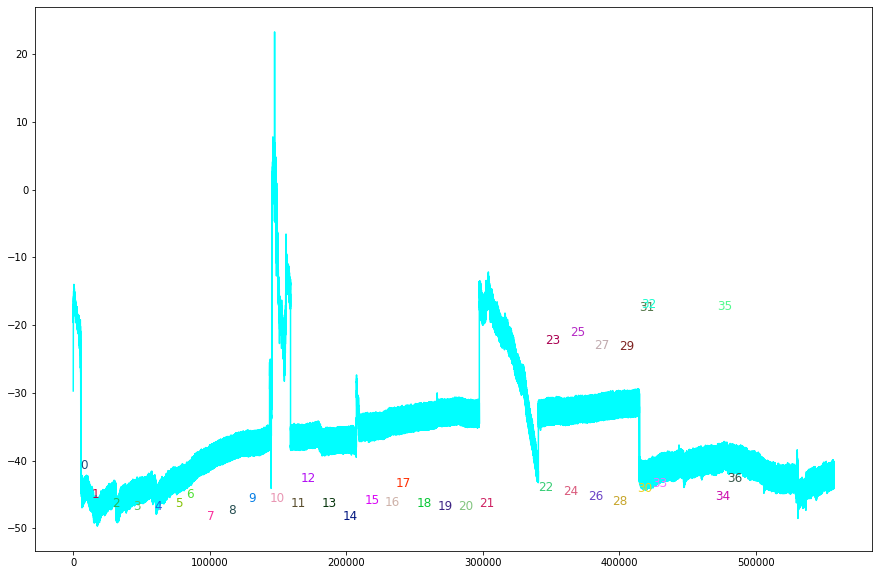

In [104]:
plot_graph(df_final.ecg2, annot_points, values_index, setup.stimulus)

In [9]:
values_index = [i for i, e in enumerate(df_final.ecg2)]
len(values_index)

557304

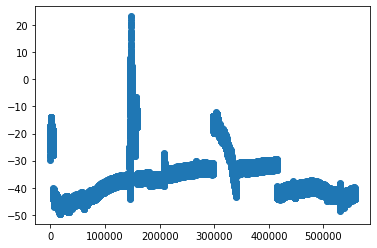

In [10]:
plt.scatter(values_index, df_final.ecg2)
# plt.annotate("Begins", (annot_points[0], df_final.ecg2[annot_points[0]]), size=15, color='black')
# plt.annotate("Maths Test", (annot_points[1]+annot_points[0], df_final.ecg2[annot_points[1]]), size=15, color='red')
# plt.annotate("Maths Test Results", (annot_points[2]+annot_points[1]+annot_points[0], df_final.ecg2[annot_points[2]]), size=15, color='purple')